# Random Forest parameter tuning

We will choose first 20 users and 100 days before start of 2015 year to tune parameters. Then we will evaluate the best fitted paramters on the same users for the whole year of 2015

In [2]:
from datetime import datetime
from datetime import timedelta
import os
import random

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt


from prediction import helpers
from prediction.predictor import Predictor
import utils.data as dutils
from utils import constants

In [3]:
# start day
START_DAY = datetime(2015,1,1) - timedelta(days=100)
WINDOW = timedelta(days=14)
EVAL_DAYS = 365

# get list of all user datasets
USER_PATHS = [os.path.join(constants.USERS_FOLDER, x) for x in os.listdir(constants.USERS_FOLDER)]

TARGET = 'spotreba'
FEATURES = ['month', 'weekday', 'hour']

# now we will choose a subset of users on which we will tune the parameters
TEST_SUBSET = USER_PATHS[0:20]

In [4]:
def eval_on_data(prd, data_paths):
    
    for index, user_path in enumerate(data_paths):
        print('%d' % (index + 1), end=', ')
        data = pd.read_csv(user_path)

        results = []
        
        for i in range(0, EVAL_DAYS):
            eval_day = START_DAY + timedelta(days=i)

            train_data = dutils.select_range(data, eval_day - WINDOW - timedelta(days=1), eval_day - timedelta(days=1))
            test_data = dutils.select_range(data, eval_day, eval_day)

            prd.train(train_data)

            predicted = prd.predict(test_data)
            
            results.append(prd.eval(predicted, test_data, train_data))
            
    return results

At first we will try different options for number of estimators.

Estimators: 1. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 4. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 7. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 10. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 13. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 16. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 19. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 22. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 25. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 28. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, Estimators: 31. Users: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

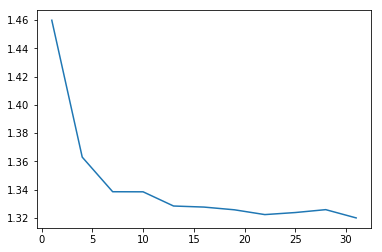

In [5]:
%%time

n_estimators_range = np.arange(1,32,3)

mase = []

users = np.random.choice(USER_PATHS, 10).tolist()

for estimators in n_estimators_range:
    print('Estimators: %d. Users: ' % (estimators), end='')
    prd = Predictor(TARGET, FEATURES, RandomForestRegressor, {
            'n_estimators': estimators
        })
    
    results = eval_on_data(prd, TEST_SUBSET)
    
    mase.append(helpers.get_mean_and_std([x.mase for x in results]))

fig, ax = plt.subplots(1,1)

ax.plot(n_estimators_range, [x[0] for x in mase], label='mean')

Seems like a 25 is a good choice, so let's continue with that. Next we want to try min_samples_split:

In [5]:
%%time

users = np.random.choice(USER_PATHS, 10).tolist()

n_min_samples_split_range = list(range(1,6))
n_min_samples_split_range[0] = 1.0

mase = []

for samples_split in n_min_samples_split_range:
    print('Samples split: %d. Users: ' % (samples_split), end='')
    prd = Predictor(TARGET, FEATURES, RandomForestRegressor, {
            'n_estimators': 25,
            'min_samples_split': 1.0
        })
    
    results = eval_on_data(prd, users)
    
    mase.append(helpers.get_mean_and_std([x.mase for x in results]))
    
fig, ax = plt.subplots(1,1)

ax.plot(n_min_samples_split_range, [x[0] for x in mase], label='mean')

Samples split: 1. Users: 1, 2, 

KeyboardInterrupt: 

In [6]:
time = %time print('test')

test
Wall time: 0 ns


In [10]:
TEST_SUBSET

['.exports/user_data_joined\\user1103.csv',
 '.exports/user_data_joined\\user114.csv',
 '.exports/user_data_joined\\user1169.csv',
 '.exports/user_data_joined\\user1192.csv',
 '.exports/user_data_joined\\user1283.csv',
 '.exports/user_data_joined\\user1629.csv',
 '.exports/user_data_joined\\user1642.csv',
 '.exports/user_data_joined\\user1697.csv',
 '.exports/user_data_joined\\user171.csv',
 '.exports/user_data_joined\\user1718.csv',
 '.exports/user_data_joined\\user1792.csv',
 '.exports/user_data_joined\\user1800.csv',
 '.exports/user_data_joined\\user1830.csv',
 '.exports/user_data_joined\\user187.csv',
 '.exports/user_data_joined\\user2018.csv',
 '.exports/user_data_joined\\user2072.csv',
 '.exports/user_data_joined\\user2094.csv',
 '.exports/user_data_joined\\user2199.csv',
 '.exports/user_data_joined\\user2233.csv',
 '.exports/user_data_joined\\user2337.csv']